In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,confusion_matrix,recall_score,f1_score,classification_report
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from scipy.stats import randint

import warnings
warnings.filterwarnings('ignore')

In [25]:
reviews_df=pd.read_csv('Amazon_Reviews.csv')
y=reviews_df['Label']
reviews_df.drop(columns='Label',inplace=True)
reviews_df

,Review
0,Stuning even for the non-gamer: This sound tr...
1,The best soundtrack ever to anything.: I'm re...
2,Amazing!: This soundtrack is my favorite musi...
3,Excellent Soundtrack: I truly like this sound...
4,"Remember, Pull Your Jaw Off The Floor After H..."
...,...
194,A Book That Is Worth a Second Look: This book...
195,Best game ever: This games makes even amazing...
196,Guitar in Absentia: With all due respect to a...
197,Stiff and Smells like drying paint: You get w...


## Tokenize

In [26]:
regexp=RegexpTokenizer(r'\w+')
stopwords_en=stopwords.words('english')
lemmatizer=WordNetLemmatizer()      
vectorizer=TfidfVectorizer()

In [27]:
X_train,X_test,y_train,y_test=train_test_split(reviews_df,y,test_size=0.2,random_state=42)

In [28]:
vectorizer.decode(X_train['Review'][0])

' Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate video game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^'

# Preprocessing

In [29]:
def preprocessing(review):
    
    tokens=regexp.tokenize(review)
    
    pure_tokens=[token.lower() for token in tokens if token.lower() not in stopwords_en]
    
    lemma_tokens=[lemmatizer.lemmatize(pure_token,pos='v') for pure_token in pure_tokens]
    
    return ' '.join(lemma_tokens)

In [30]:
X_train['Review']=X_train['Review'].apply(preprocessing)

X_test['Review']=X_test['Review'].apply(preprocessing)

In [31]:
X_train_tfidf=vectorizer.fit_transform(X_train['Review'])


X_test_tfidf=vectorizer.transform(X_test['Review'])

# Machine Learning Models Supervised

## 1. Logistic Regression

In [32]:
logreg=LogisticRegression()
logreg.fit(X_train_tfidf,y_train)
logreg_pred=logreg.predict(X_test_tfidf)
print('Train Score',logreg.score(X_train_tfidf,y_train))
print('Test Score',logreg.score(X_test_tfidf,y_test))

Train Score 0.9937106918238994
Test Score 0.825


## Metrics

In [33]:
confusion_matrix(y_test,logreg_pred)

array([[ 9,  6],
       [ 1, 24]], dtype=int64)

## Lasso

In [34]:
lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(X_train_tfidf,(y_train))
pred=lasso_reg.predict(X_test_tfidf)
pred

array([0.5408805, 0.5408805, 0.5408805, 0.5408805, 0.5408805, 0.5408805,
       0.5408805, 0.5408805, 0.5408805, 0.5408805, 0.5408805, 0.5408805,
       0.5408805, 0.5408805, 0.5408805, 0.5408805, 0.5408805, 0.5408805,
       0.5408805, 0.5408805, 0.5408805, 0.5408805, 0.5408805, 0.5408805,
       0.5408805, 0.5408805, 0.5408805, 0.5408805, 0.5408805, 0.5408805,
       0.5408805, 0.5408805, 0.5408805, 0.5408805, 0.5408805, 0.5408805,
       0.5408805, 0.5408805, 0.5408805, 0.5408805])

## Schochastic Gradient Descent Classifier(SGDClassifier)

In [35]:
sgd_reg=SGDClassifier(alpha=1)
sgd_reg.fit(X_train_tfidf,y_train)
pred=sgd_reg.predict(X_test_tfidf)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

# 2. Decision Tree Classifier

In [36]:
ds_tree=DecisionTreeClassifier()
ds_tree.fit(X_train_tfidf,y_train)
pred=ds_tree.predict(X_test_tfidf)
print('Train score',ds_tree.score(X_train_tfidf,y_train))
print('Test Score',ds_tree.score(X_test_tfidf,y_test))


Train score 1.0
Test Score 0.675


# Hyperparameter Decision Tree

In [37]:
ds_tree=DecisionTreeClassifier()

param_dist={"max_depth":[3,None],
            "min_samples_leaf": randint(1,9),
            "criterion":["gini","entropy"]
           }
rscv=RandomizedSearchCV(ds_tree,param_distributions=param_dist,cv=5)
rscv.fit(X_train_tfidf,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022BA208AD90>})

In [38]:
print(rscv.best_params_)
print(rscv.best_estimator_)
print(rscv.best_score_)

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 7}
DecisionTreeClassifier(min_samples_leaf=7)
0.6100806451612903


# 3. Random Forest Classifier

In [39]:
n_estimators=list(range(20,200,20))
accuracy=[]

for num in n_estimators:
    rf=RandomForestClassifier(n_estimators=num)
    rf.fit(X_train_tfidf,y_train)
    accuracy.append(rf.score(X_test_tfidf,y_test))   

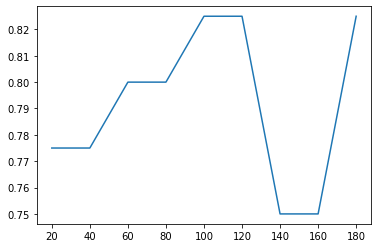

In [40]:
plt.plot(n_estimators,accuracy)

# 4. Ada Boost Classifier

In [41]:
learning_rate=[0.2,0.4,0.6,0.8]
n_estimators=np.arange(10,200,20)
accuracy=[]

for num in learning_rate:
    abc=AdaBoostClassifier(learning_rate=num)
    abc.fit(X_train_tfidf,y_train)
    accuracy.append(abc.score(X_test_tfidf,y_test))   

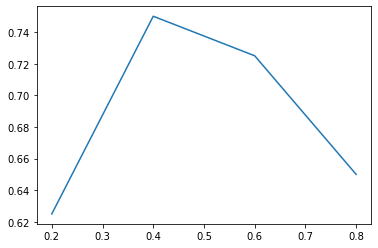

In [42]:
plt.plot(learning_rate,accuracy)

## Hyperparameter Tunning

In [43]:
rf=RandomForestClassifier(random_state=42)

param_dict={
            'n_estimators':[50,60,70,100],
            'min_samples_split':[4,7,9],
            'max_depth':[7,8,9,10],
            'max_features':['auto','sqrt','log2']
           }
rscv=RandomizedSearchCV(rf,param_distributions=param_dict,cv=5,verbose=5)
rscv.fit(X_train_tfidf,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=9, max_features=sqrt, min_samples_split=4, n_estimators=100; total time=   0.6s
[CV 2/5] END max_depth=9, max_features=sqrt, min_samples_split=4, n_estimators=100; total time=   1.0s
[CV 3/5] END max_depth=9, max_features=sqrt, min_samples_split=4, n_estimators=100; total time=   0.6s
[CV 4/5] END max_depth=9, max_features=sqrt, min_samples_split=4, n_estimators=100; total time=   1.1s
[CV 5/5] END max_depth=9, max_features=sqrt, min_samples_split=4, n_estimators=100; total time=   1.1s
[CV 1/5] END max_depth=7, max_features=auto, min_samples_split=9, n_estimators=50; total time=   0.2s
[CV 2/5] END max_depth=7, max_features=auto, min_samples_split=9, n_estimators=50; total time=   0.4s
[CV 3/5] END max_depth=7, max_features=auto, min_samples_split=9, n_estimators=50; total time=   0.3s
[CV 4/5] END max_depth=7, max_features=auto, min_samples_split=9, n_estimators=50; total time=   0.7s
[CV 5/5] END max

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [7, 8, 9, 10],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [4, 7, 9],
                                        'n_estimators': [50, 60, 70, 100]},
                   verbose=5)

In [57]:
print(rscv.best_params_)
print(rscv.best_estimator_)
print(rscv.best_score_)

{'kernel': 'rbf', 'gamma': 1, 'C': 1000}
SVC(C=1000, gamma=1)
0.6915322580645161


# 5. Gradiant Boost Classifier

In [45]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train_tfidf,y_train)
pred=gbc.predict(X_test_tfidf)
print('Train Score',gbc.score(X_train_tfidf,y_train))
print('Test Score',gbc.score(X_test_tfidf,y_test))

Train Score 1.0
Test Score 0.725


In [46]:
confusion_matrix(y_test,pred)

array([[ 9,  6],
       [ 5, 20]], dtype=int64)

In [47]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.64      0.60      0.62        15
           1       0.77      0.80      0.78        25

    accuracy                           0.73        40
   macro avg       0.71      0.70      0.70        40
weighted avg       0.72      0.72      0.72        40



# 6. XGBoost Classifier

In [48]:
from xgboost import XGBClassifier

xgb=XGBClassifier()
xgb.fit(X_train_tfidf,y_train)
pred=xgb.predict(X_test_tfidf)
print('Train Score',xgb.score(X_train_tfidf,y_train))
print('Test Score',xgb.score(X_test_tfidf,y_test))

[10:17:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Score 1.0
Test Score 0.725


# 7. Naive Bayes Classifier

In [49]:
X_train_tfidf_converted=X_train_tfidf.toarray()
X_test_tfidf_converted=X_test_tfidf.toarray()


In [50]:
gnb=GaussianNB()
gnb.fit(X_train_tfidf_converted,y_train)
pred=gnb.predict(X_test_tfidf_converted)
print('Train score',gnb.score(X_train_tfidf_converted,y_train))
print('Test Score',gnb.score(X_test_tfidf_converted,y_test))

Train score 1.0
Test Score 0.725


# 8. Support Vector Machine

In [51]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train_tfidf,y_train)
pred=svc.predict(X_test_tfidf)
print('Train score',svc.score(X_train_tfidf,y_train))
print('Test Score',svc.score(X_test_tfidf,y_test))

Train score 1.0
Test Score 0.75


## Hyperparameter Tuning (SVC)

In [53]:
param_dict={
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['rbf']
}
rscv=RandomizedSearchCV(svc,param_dict,refit=True,verbose=3)
rscv.fit(X_train_tfidf,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 4/5] END .................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 5/5] END .................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 1/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END .....................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=1, gamma=0.1

RandomizedSearchCV(estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf']},
                   verbose=3)

In [54]:
print(rscv.best_params_)
print(rscv.best_estimator_)
print(rscv.best_score_)

{'kernel': 'rbf', 'gamma': 1, 'C': 1000}
SVC(C=1000, gamma=1)
0.6915322580645161


# 9. K Nearest Neighbors Classifier


In [55]:
knn=KNeighborsClassifier()
knn.fit(X_train_tfidf,y_train)
pred=knn.predict(X_test_tfidf)
print('Train Score',knn.score(X_train_tfidf,y_train))
print('Test Score',knn.score(X_test_tfidf,y_test))


Train Score 0.7861635220125787
Test Score 0.7


# Unsupervised 
## K-Mean Clustering

Text(0.5, 1.0, 'Elbow Curve')

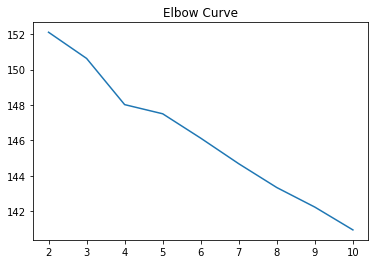

In [56]:
from sklearn.cluster import KMeans
kmns=KMeans()
kmns.fit(X_train_tfidf)

#finding the optimul number of clusters

num_clusters=range(2,11)

wss=[]  # Within Sum Of Square(WSS)

for n in num_clusters:
    kmns=KMeans(n_clusters=n)
    kmns.fit(X_train_tfidf)
    wss.append(kmns.inertia_)
    
plt.plot(num_clusters,wss)
plt.title('Elbow Curve')
    